In [237]:
import pandas as pd          
import numpy as np 
import seaborn as sns # For mathematical calculations
import matplotlib.pyplot as plt  # For plotting graphs





In [238]:
#Attribute Information (in order):
#- CRIM per capita crime rate by town
#- ZN proportion of residential land zoned for lots over 25,000 sq.ft.
#- INDUS proportion of non-retail business acres per town
#- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#- NOX nitric oxides concentration (parts per 10 million)
#- RM average number of rooms per dwelling
#- AGE proportion of owner-occupied units built prior to 1940
#- DIS weighted distances to five Boston employment centres
#- RAD index of accessibility to radial highways
#- TAX full-value property-tax rate per  10,000
# - PTRATIO  pupil-teacher ratio by town
# - B  1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# - LSTAT    % lower status of the population
#- MEDV     Median value of owner-occupied homes c

In [239]:
df = pd.read_csv('HousingData.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [241]:
## checking the percentage of nan values present in each feature

features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]

for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')

CRIM 0.0395  % missing values
ZN 0.0395  % missing values
INDUS 0.0395  % missing values
CHAS 0.0395  % missing values
AGE 0.0395  % missing values
LSTAT 0.0395  % missing values


In [242]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [243]:
df = df.fillna(df.mean())

In [244]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [245]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualisizing the numerical variables
df[numerical_features].head()

Number of numerical variables:  14


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.980000,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.140000,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.030000,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.940000,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,12.715432,36.2


In [246]:


discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 2


In [247]:
discrete_feature

['CHAS', 'RAD']

In [248]:
df['CHAS'].value_counts()

0.000000    452
1.000000     34
0.069959     20
Name: CHAS, dtype: int64

In [249]:
df['RAD'].value_counts()

24    132
5     115
4     110
3      38
6      26
2      24
8      24
1      20
7      17
Name: RAD, dtype: int64

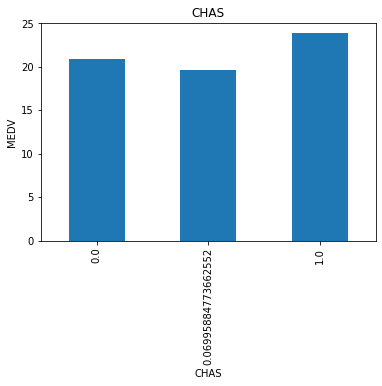

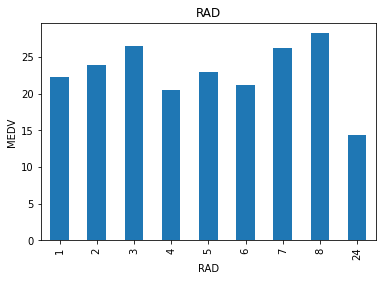

In [250]:
##  the realtionship between them and MEDV

for feature in discrete_feature:
    data=df.copy()
    data.groupby(feature)['MEDV'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('MEDV')
    plt.title(feature)
    plt.show()

In [251]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 12


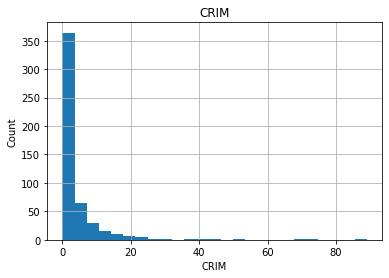

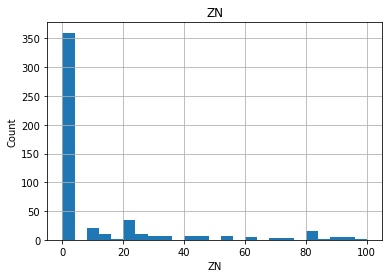

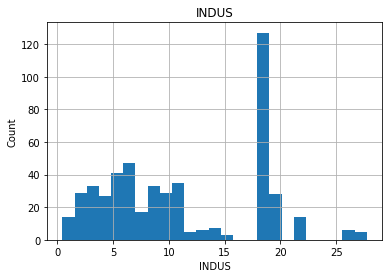

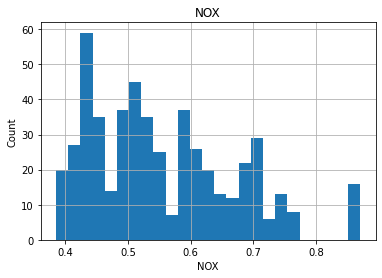

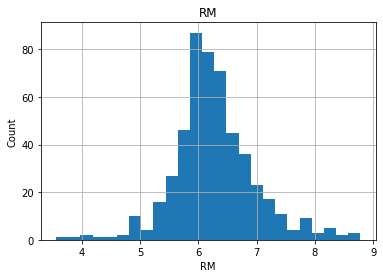

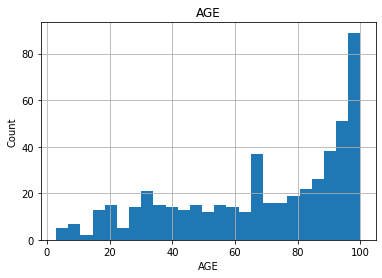

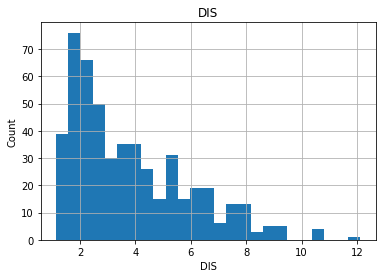

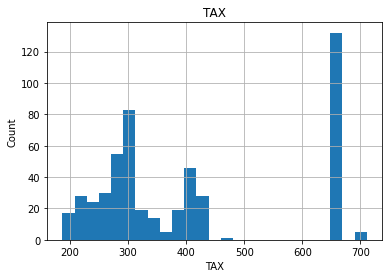

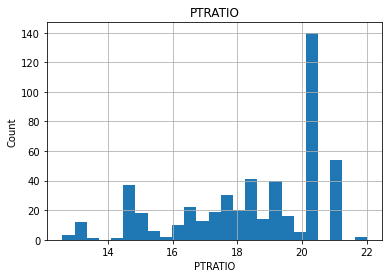

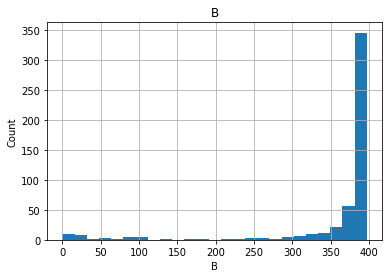

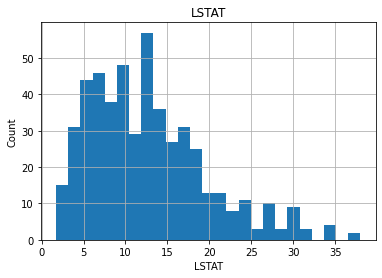

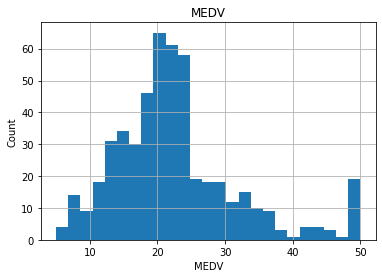

In [252]:
##  analysing the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()


The histogram  shows that columns CRIM, ZN, B has highly skewed distributions. Also MEDV looks to have a normal distribution 

In [253]:
# Check the  Statistical Numerical Data Distribution Summary
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.545770,22.921051,6.699165,0.250233,0.115878,0.702617,27.439466,2.105710,8.707259,168.537116,2.164946,91.294864,7.012739,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,7.230000,17.025000
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.208500,74.450000,3.207450,5.000000,330.000000,19.050000,391.440000,11.995000,21.200000
75%,3.611874,11.211934,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [254]:
df.corr() # the correlation between the columns

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.182930,0.391161,-0.052223,0.410377,-0.215434,0.344934,-0.366523,0.608886,0.566528,0.273384,-0.370163,0.434044,-0.379695
ZN,-0.182930,1.000000,-0.513336,-0.036147,-0.502287,0.316550,-0.541274,0.638388,-0.306316,-0.308334,-0.403085,0.167431,-0.407549,0.365943
INDUS,0.391161,-0.513336,1.000000,0.058035,0.740965,-0.381457,0.614592,-0.699639,0.593176,0.716062,0.384806,-0.354597,0.567354,-0.478657
CHAS,-0.052223,-0.036147,0.058035,1.000000,0.073286,0.102284,0.075206,-0.091680,0.001425,-0.031483,-0.109310,0.050055,-0.046166,0.179882
NOX,0.410377,-0.502287,0.740965,0.073286,1.000000,-0.302188,0.711461,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.572379,-0.427321
RM,-0.215434,0.316550,-0.381457,0.102284,-0.302188,1.000000,-0.241351,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.602962,0.695360
AGE,0.344934,-0.541274,0.614592,0.075206,0.711461,-0.241351,1.000000,-0.724353,0.449989,0.500589,0.262723,-0.265282,0.574893,-0.380223
DIS,-0.366523,0.638388,-0.699639,-0.091680,-0.769230,0.205246,-0.724353,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.483429,0.249929
RAD,0.608886,-0.306316,0.593176,0.001425,0.611441,-0.209847,0.449989,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.468440,-0.381626
TAX,0.566528,-0.308334,0.716062,-0.031483,0.668023,-0.292048,0.500589,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.524545,-0.468536


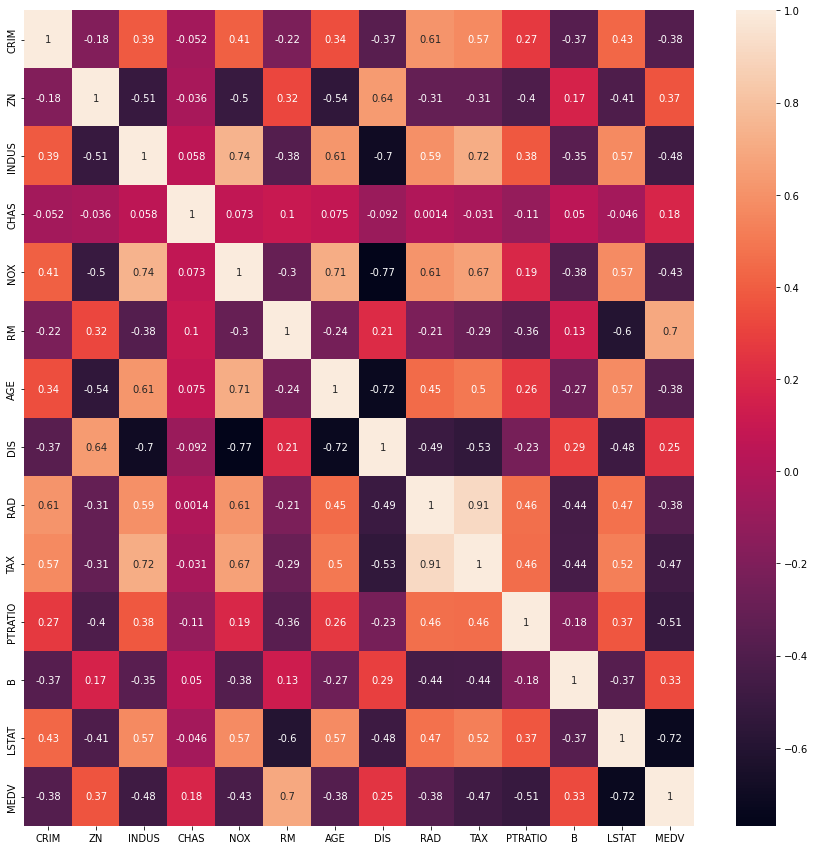

In [255]:
# Correlation of the columns shown in a heatmap
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True);

From correlation matrix, we see TAX and RAD are highly correlated features. The columns LSTAT, INDUS, RM, TAX, NOX, PTRAIO has a correlation score above 0.5 with MEDV

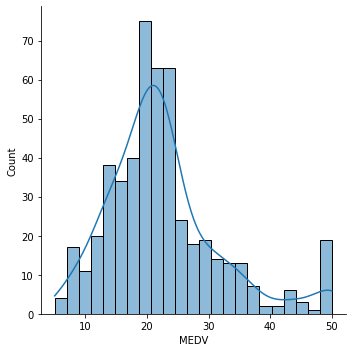

In [256]:
sns.displot(df['MEDV'],kde=True)

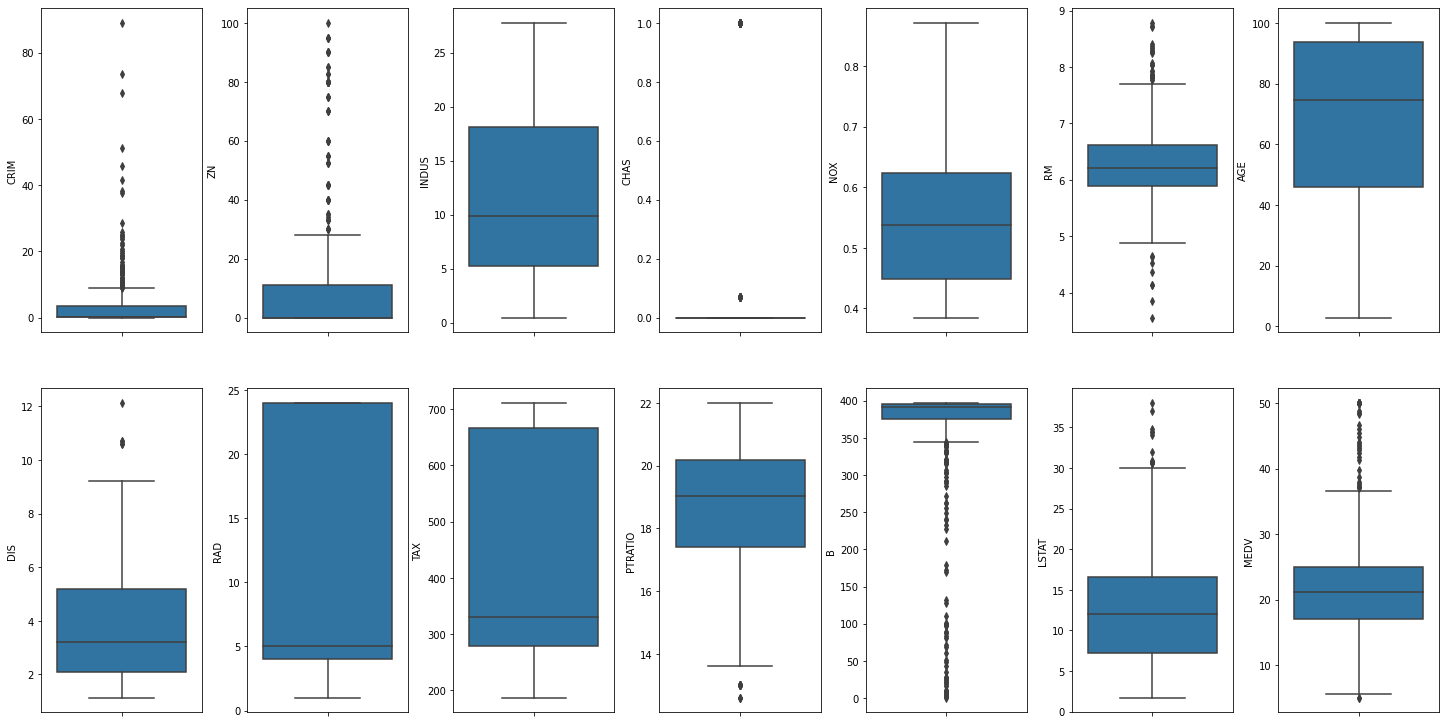

In [257]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [258]:
   for k, v in df.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 12.65%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 2.37%
Column MEDV outliers = 7.91%


In [259]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
print(z)

         CRIM        ZN     INDUS      CHAS       NOX        RM           AGE  \
0    0.422328  0.296443  1.311010  0.279851  0.144217  0.413672  1.210593e-01   
1    0.419870  0.489639  0.599771  0.279851  0.740262  0.194274  3.787156e-01   
2    0.419872  0.489639  0.599771  0.279851  0.740262  1.282714  2.706270e-01   
3    0.419277  0.489639  1.330435  0.279851  0.835284  1.016303  8.287698e-01   
4    0.414981  0.489639  1.330435  0.279851  0.835284  1.228577  5.223385e-01   
..        ...       ...       ...       ...       ...       ...           ...   
501  0.415733  0.489639  0.126411  0.279851  0.158124  0.439316  2.121240e-02   
502  0.417766  0.489639  0.126411  0.279851  0.158124  0.234548  2.984598e-01   
503  0.415952  0.489639  0.126411  0.279851  0.158124  0.984960  8.201227e-01   
504  0.410232  0.489639  0.126411  0.279851  0.158124  0.725672  7.581068e-01   
505  0.417515  0.489639  0.126411  0.279851  0.158124  0.362767  5.184109e-16   

          DIS       RAD    

In [260]:
threshold = 3
print(np.where(z > 3))

(array([ 55,  56,  57,  65,  66, 102, 141, 142, 154, 155, 160, 162, 163,
       195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 208, 209, 210,
       211, 212, 216, 218, 219, 220, 221, 222, 225, 234, 236, 254, 255,
       256, 257, 262, 269, 273, 274, 276, 277, 282, 283, 283, 284, 286,
       290, 291, 292, 347, 348, 351, 352, 353, 353, 354, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 438, 445, 450, 454, 455, 456, 457, 466]), array([ 1,  1,  1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        5,  3,  3,  1,  1,  1,  5,  5,  3,  3,  3,  3,  3,  3,  1,  3,  1,
        1,  1,  1,  1,  1,  1,  7,  7,  1,  7,  1,  7,  7,  3,  3,  3,  3,
        3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,  0,  

In [261]:
df = df[(z < 3).all(axis=1)]
df.shape

(403, 14)

In [262]:
from sklearn import preprocessing
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_s = ['LSTAT',  'NOX', 'PTRATIO', 'RM', 'DIS', 'AGE']
X = df.loc[:,column_s]
Y = df['MEDV']
X = pd.DataFrame(data=min_max_scaler.fit_transform(X))

In [263]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.30,random_state=42)
X_train.head(10)


,0,1,2,3,4,5
225,0.188698,0.385892,0.000000,0.989922,0.155517,0.660144
258,0.330139,0.321577,0.658537,0.416982,0.206722,0.901133
158,0.340383,0.448133,0.207317,0.380952,0.151432,0.972194
109,0.463648,0.327801,0.585366,0.393046,0.160669,0.878476
17,0.427627,0.309129,0.975610,0.408667,0.383521,0.811535
234,0.094514,0.111826,0.231707,0.655077,0.506047,0.675783
24,0.481494,0.309129,0.975610,0.392038,0.401115,0.939238
323,0.601124,0.630705,0.878049,0.347443,0.057650,0.988671
148,0.155321,0.448133,0.207317,0.427816,0.073034,1.000000
247,0.256775,0.091286,0.378049,0.559839,0.536716,0.386200


In [264]:
# Define the model
tree = DecisionTreeRegressor(splitter='best',min_samples_leaf=10)
tree.fit(X_train,Y_train)


DecisionTreeRegressor(min_samples_leaf=10)

In [277]:

print(tree.score(X_train,Y_train))
print(tree.score(X_test,Y_test))


0.8340149195631952
0.7332630104922144


In [266]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

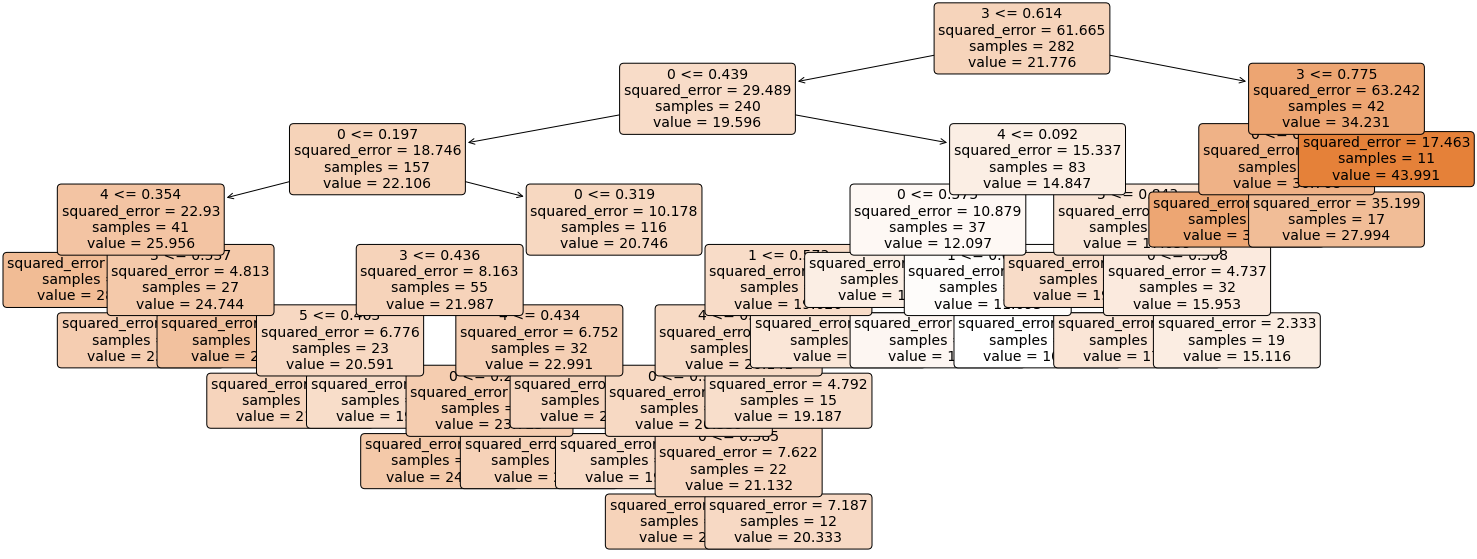

In [267]:
plt.figure(figsize=(25,10))
a = plot_tree(tree, 
              feature_names=X.columns, 
              class_names=Y, 
              filled=True, 
              rounded=True, 
              fontsize=14)

In [268]:
# Define the hyperparameters to search
param_grid = { "max_depth": [2,5,10,8],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 5, 10],
    'max_features':['auto','log2'],
    'splitter':['best']
    }



In [269]:
# Create a grid search object with cross-validation
grid_search = GridSearchCV(tree, param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train,Y_train)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(min_samples_leaf=10),
             param_grid={'max_depth': [2, 5, 10, 8],
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 20],
                         'splitter': ['best']})

In [270]:
print(grid_search.best_params_)

{'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 10, 'min_samples_split': 5, 'splitter': 'best'}


In [271]:
print(grid_search.score(X_test,Y_test))

0.6728658836209005


In [272]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error



In [273]:
# Define the parameter grid
param_grid = {
               'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
              'min_samples_leaf': [1, 2, 4, 8, 16, 32, 64],
              "min_samples_split": [2, 5, 10, 20,30,40],
              'max_features':['auto','log2'],
               'splitter':['best']
              }

# Use RandomizedSearchCV for hyperparameter tuning
rs_cv = RandomizedSearchCV(tree, param_grid,n_iter=20, cv=5,
                           scoring='neg_mean_squared_error', random_state=0)

# Fit the model to the training data
rs_cv.fit(X_train,Y_train)







RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(min_samples_leaf=10),
                   n_iter=20,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'log2'],
                                        'min_samples_leaf': [1, 2, 4, 8, 16, 32,
                                                             64],
                                        'min_samples_split': [2, 5, 10, 20, 30,
                                                              40],
                                        'splitter': ['best']},
                   random_state=0, scoring='neg_mean_squared_error')

In [274]:
print(rs_cv.best_params_)

{'splitter': 'best', 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 100}


In [275]:
print(rs_cv.score(X_test,Y_test))


-19.957708541324397


In [276]:
from sklearn.metrics import r2_score
 # Predict on the test data
y_pred = rs_cv.predict(X)

# Calculate the mean squared error
mse = mean_squared_error(Y, y_pred)
print("Mean Squared Error:", mse)


test_set_r2 = r2_score(Y, y_pred)


print("r2 score",test_set_r2)

Mean Squared Error: 8.429104039565004
r2 score 0.8674629062998118
